<a href="https://colab.research.google.com/github/ritik-hue/deep-learning-projects/blob/main/Churnprediction_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('/content/drive/MyDrive/Churn_Modelling.csv')

In [2]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.duplicated().sum()

0

In [4]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [5]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [8]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [17]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)


In [18]:
X = df.drop(columns=['Exited'])
y=df['Exited'].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)


In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train1=scaler.fit_transform(X_train)
x_test1=scaler.transform(X_test)

In [23]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [34]:
model=Sequential()
model.add(Dense(11,activation='sigmoid',input_dim=11))
model.add(Dense(6,activation='relu',input_dim=11))
model.add(Dense(1,activation='sigmoid'))


In [35]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])


In [45]:
history=model.fit(x_train1,y_train,epochs=20,verbose=1,validation_split=0.2)

Epoch 1/20
200/200 [==============================] - 1s 3ms/step - loss: 0.3387 - accuracy: 0.8619 - val_loss: 0.3489 - val_accuracy: 0.8631
Epoch 2/20
200/200 [==============================] - 0s 2ms/step - loss: 0.3382 - accuracy: 0.8612 - val_loss: 0.3490 - val_accuracy: 0.8637
Epoch 3/20
200/200 [==============================] - 0s 2ms/step - loss: 0.3376 - accuracy: 0.8625 - val_loss: 0.3491 - val_accuracy: 0.8619
Epoch 4/20
200/200 [==============================] - 0s 2ms/step - loss: 0.3368 - accuracy: 0.8625 - val_loss: 0.3498 - val_accuracy: 0.8581
Epoch 5/20
200/200 [==============================] - 0s 2ms/step - loss: 0.3368 - accuracy: 0.8620 - val_loss: 0.3512 - val_accuracy: 0.8569
Epoch 6/20
200/200 [==============================] - 0s 2ms/step - loss: 0.3371 - accuracy: 0.8625 - val_loss: 0.3497 - val_accuracy: 0.8606
Epoch 7/20
200/200 [==============================] - 0s 2ms/step - loss: 0.3362 - accuracy: 0.8636 - val_loss: 0.3499 - val_accuracy: 0.8619
Epoch 

In [37]:
model.layers[0].get_weights()

[array([[ 2.54874647e-01, -4.99089733e-02,  1.62072822e-01,
         -1.01628855e-01,  4.19921875e-01, -9.44148842e-03,
          2.36929625e-01,  3.70205522e-01,  1.11332081e-01,
          1.83590442e-01,  3.58985290e-02],
        [ 8.14380109e-01, -8.69251311e-01,  1.43127418e+00,
         -7.20697284e-01,  2.22586602e-01, -1.28374204e-01,
         -9.13178682e-01, -1.42855847e+00,  3.82381052e-01,
          7.08647668e-02, -1.64668822e+00],
        [-1.22440988e-02, -4.43856679e-02, -1.14103414e-01,
          1.26504764e-01,  3.98164615e-02, -2.25519821e-01,
         -1.95300773e-01, -1.20445006e-01,  9.71649513e-02,
          2.17223942e-01,  3.28000039e-01],
        [-2.21535675e-02, -3.21370989e-01, -4.03794467e-01,
         -5.52610755e-01, -2.18819007e-02, -7.66503632e-01,
         -1.21918947e-01, -1.72212780e-01,  4.01222408e-01,
         -9.84426662e-02,  2.21801698e-01],
        [ 4.42077547e-01,  1.02009320e+00,  2.77707189e-01,
         -4.60744739e-01, -2.82517135e-01, -

In [38]:
y_log=model.predict(x_test1)

63/63 [==============================] - 0s 3ms/step


In [39]:
y_pred=np.where(y_log>0.5,1,0)

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8525

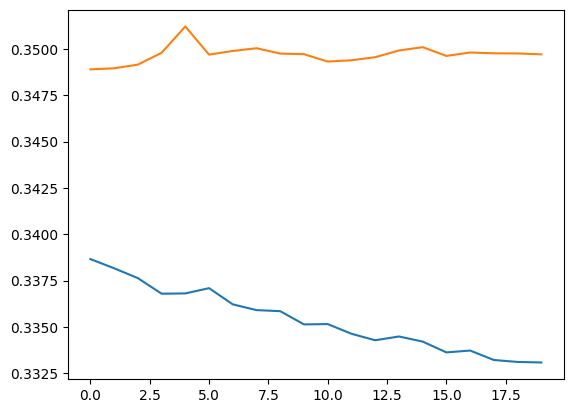

In [46]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])